<a href="https://colab.research.google.com/github/Eze1995/Analisis-en-python-ClientesBanco/blob/main/Analisis_en_Python_ClientesBanco.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Business problem: A banking entity hires a marketing company in charge of contacting possible clients via telephone to know if they're interested in making a deposit at a fixed term or not with the entity.

Wich profile of clients have the most conversion potential?



2. The dataset

The information collected by the marketing company is helded in a CSV(dataset_banco.csv). It has 45215 rows and 17 columns.

Each record has 16 features (first 16 columns) and one category ("yes" or "no" depending if the person is interested in acquiring the product or not).
The columns are:

"age":(numeric)

"job": tipe of job(categorical: "admin.", "unknown", "unemployed",

"management", "housemaid", "entrepreneur", "student", "blue-collar",

"self-employed", "retired", "technician", "services")


"marital": marital status (categorical: "married", "divorced", "single")

"education": educational level (categorical: "unknown", "secondary", "primary", "tertiary")

"default": has payed it's obligations (categorical: "yes", "no")

"balance": anual average balance in euros (numeric)

"housing": does it have a mortgage credit? (categorical: "yes", "no")

"loan": does it have consumer lendings? (categorical: "yes", "no")

"contact": contact medium (categorical: "unknown",
"telephone", "cellular")

"day": last day of the month in wich was contacted (numeric)

"month": last month in wich was contacted (categorical: "jan", "feb", "mar", ..., "nov", "dec")

"duration": duration (in seconds) of the last contact (numeric)

"campaign": total number of times that was contacted (numeric)

"pdays": number of days elapsed after being contacted before the current campaign (numeric. -1 indicates that you were not previously contacted)

"previous": number of times that has been contacted before this campaign (numeric)

"poutcome": result of the previous marketing campaign (categorical: "unknown", "other", "failure", "success")

"y": category ¿does the client suscribed to a fixed term deposit? (categorical: "yes", "no")


In [88]:
import seaborn as sns
import matplotlib.pyplot as plt


In [89]:
import pandas as pd
url = "https://raw.githubusercontent.com/Eze1995/Analisis-en-python-ClientesBanco/main/dataset_banco.csv"
data = pd.read_csv(url)


In [90]:
data.shape

(45215, 17)

In [91]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261.0,1,-1.0,0,unknown,no
1,44,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151.0,1,-1.0,0,unknown,no
2,33,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76.0,1,-1.0,0,unknown,no
3,47,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92.0,1,-1.0,0,unknown,no
4,33,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198.0,1,-1.0,0,unknown,no


In [92]:
#Cheking the variables
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45215 entries, 0 to 45214
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45215 non-null  int64  
 1   job        45213 non-null  object 
 2   marital    45214 non-null  object 
 3   education  45214 non-null  object 
 4   default    45215 non-null  object 
 5   balance    45213 non-null  float64
 6   housing    45215 non-null  object 
 7   loan       45215 non-null  object 
 8   contact    45215 non-null  object 
 9   day        45215 non-null  int64  
 10  month      45215 non-null  object 
 11  duration   45214 non-null  float64
 12  campaign   45215 non-null  int64  
 13  pdays      45214 non-null  float64
 14  previous   45215 non-null  int64  
 15  poutcome   45215 non-null  object 
 16  y          45215 non-null  object 
dtypes: float64(3), int64(4), object(10)
memory usage: 5.9+ MB


CLEANING

Missing values:
As we can see, we have missing values in the columns "job","marital","education","balance","duration", and "pdays"
Having in count that there are few missing values we can dispense them.

In [93]:
data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45207 entries, 0 to 45214
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45207 non-null  int64  
 1   job        45207 non-null  object 
 2   marital    45207 non-null  object 
 3   education  45207 non-null  object 
 4   default    45207 non-null  object 
 5   balance    45207 non-null  float64
 6   housing    45207 non-null  object 
 7   loan       45207 non-null  object 
 8   contact    45207 non-null  object 
 9   day        45207 non-null  int64  
 10  month      45207 non-null  object 
 11  duration   45207 non-null  float64
 12  campaign   45207 non-null  int64  
 13  pdays      45207 non-null  float64
 14  previous   45207 non-null  int64  
 15  poutcome   45207 non-null  object 
 16  y          45207 non-null  object 
dtypes: float64(3), int64(4), object(10)
memory usage: 6.2+ MB


CATEGORICAL COLUMNS SUBLEVELS
We can check the columns information to know if they're usefull for answering our questions.

In [94]:
#counting columns sublevels
cols_cat = ['job','marital','education','default','housing','loan','contact','poutcome','y']

for col in cols_cat:
    print(f'Column {col}:{data[col].nunique()} sublevels')


Column job:18 sublevels
Column marital:6 sublevels
Column education:10 sublevels
Column default:2 sublevels
Column housing:2 sublevels
Column loan:6 sublevels
Column contact:5 sublevels
Column poutcome:6 sublevels
Column y:2 sublevels


All categorical columns have mora than 1 sublevel, that means that we can diffenciate the sublevel to make a classification, because of that we are going to keep all of them.

NUMERICAL COLUMNS CHECK

In [95]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45207.000000,45207.000000,45207.000000,45207.000000,45207.000000,45207.000000,45207.000000
mean,41.005596,1374.201318,15.806534,258.032539,2.763731,40.178225,0.580198
std,12.037399,3924.491665,8.323015,257.460759,3.098058,100.103283,2.303341
min,18.000000,-8019.000000,1.000000,-1389.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1427.500000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,776.000000,527532.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


As the standar deviation of all the columns is different than 0 we can be sure that the columns contains a range of values and not the same value repeated in every cell.

DUPLICATED ROWS

In [96]:
print(f'Size of the dataset before dropping duplicates: {data.shape}')
data.drop_duplicates(inplace=True)
print(f'Size of the dataset after dropping duplicates: {data.shape}')

Size of the dataset before dropping duplicates: (45207, 17)
Size of the dataset after dropping duplicates: (45203, 17)


OUTLIERS CHECK


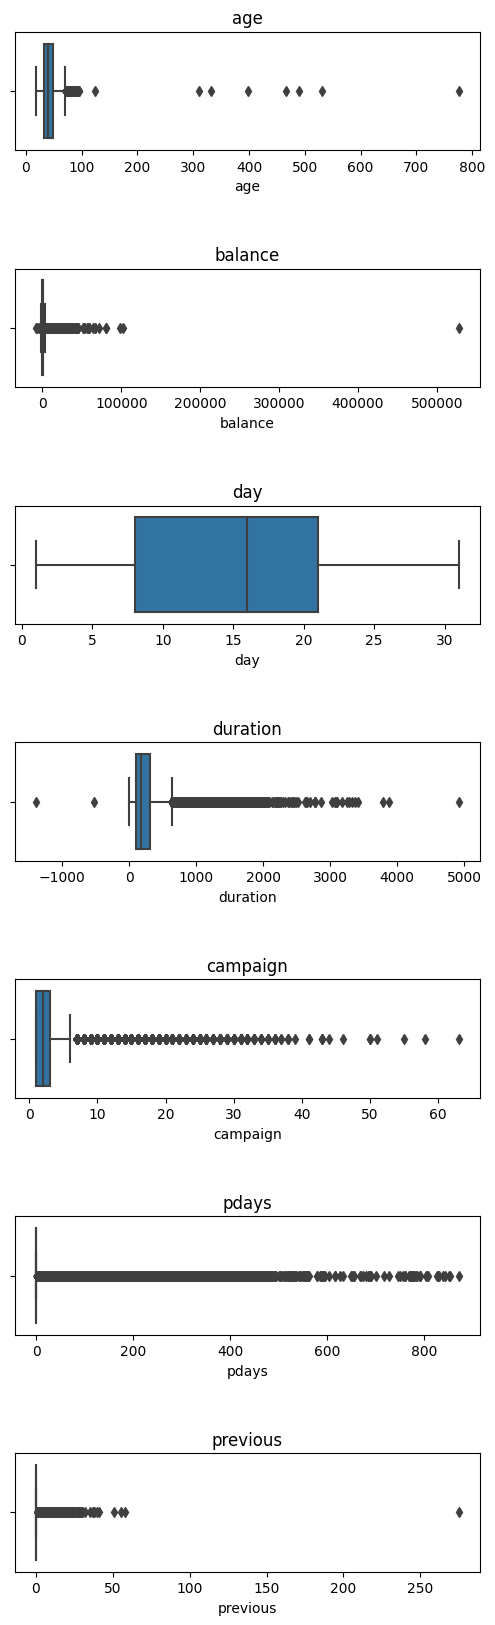

In [97]:
cols_num = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

fig, ax = plt.subplots(nrows=7, ncols=1, figsize=(6,20))
fig.subplots_adjust(hspace=1)

for i, col in enumerate(cols_num):
    sns.boxplot(x=col, data=data, ax=ax[i])
    ax[i].set_title(col)


As we can see, there are some strange values in the data, lets see them:
* In the column age we have people with much more than 100 years
* In the column duration we have negative values(how can a call endure less than 0 seconds?)
* In the column previous we have a value of almost 300(that's too much)

Dealing with this problems

In [98]:
#Dropping ages over 100
print(f'Size of the dataset before removing ages over 100: {data.shape}')
data = data[data['age']<= 100]
print(f'Size of the dataset after removing ages over 100: {data.shape}')

Size of the dataset before removing ages over 100: (45203, 17)
Size of the dataset after removing ages over 100: (45195, 17)


In [99]:
#Dropping negative values from duration
print(f'Size of the dataset before removing less than 0 seconds duration calls: {data.shape}')
data = data[data ['duration'] > 0]
print(f'Size of the dataset after removing less than 0 seconds duration calls: {data.shape}')

Size of the dataset before removing less than 0 seconds duration calls: (45195, 17)
Size of the dataset after removing less than 0 seconds duration calls: (45190, 17)


In [100]:
#Dropping values over 100 from column previous
print(f'Size of the dataset before removing values over 100 from column previous: {data.shape}')
data = data[data['previous'] <= 100]
print(f'Size of the dataset after removing values over 100 from column previous: {data.shape}')

Size of the dataset before removing values over 100 from column previous: (45190, 17)
Size of the dataset after removing values over 100 from column previous: (45189, 17)


CHECKING FOR SPELLING ERRORS

It may be that the same column has different names for the same feature for example "Married" and "married" or "Unknown" and "UKW", for us is easy to understand but we can't treat them as the same in order to make the data readable for python. We need to unify them.

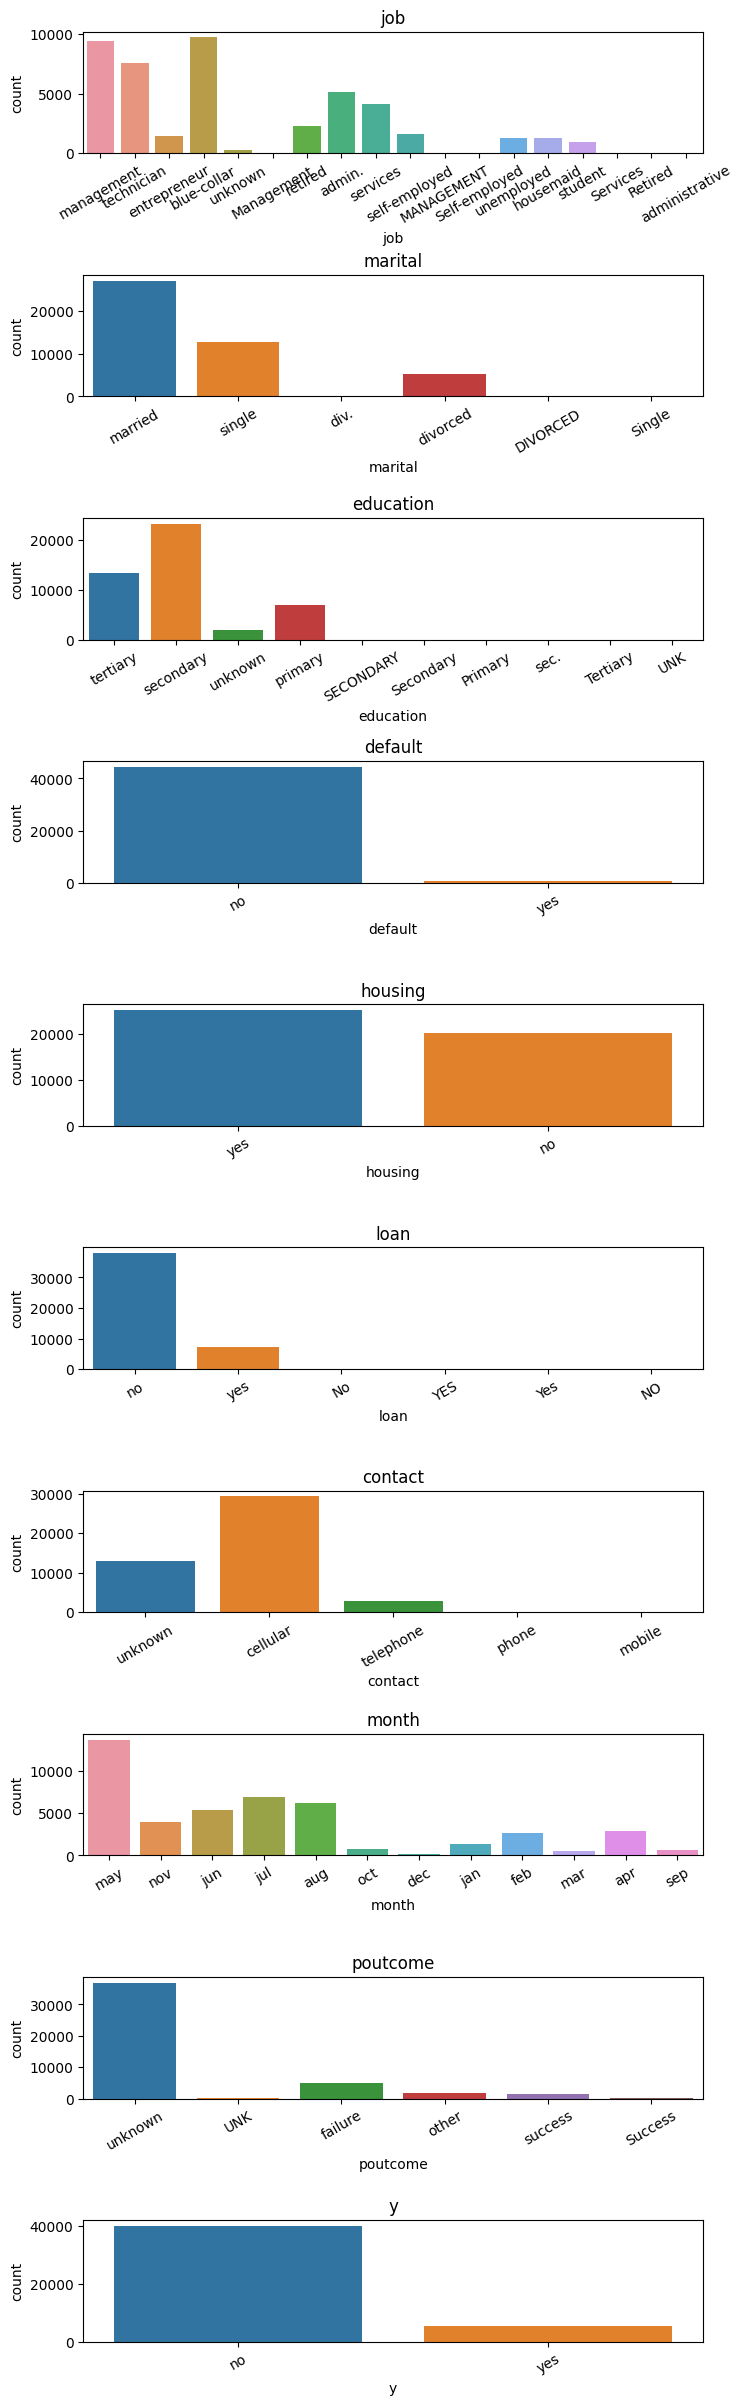

In [101]:
cols_cat = ['job', 'marital', 'education', 'default', 'housing',
       'loan', 'contact', 'month', 'poutcome', 'y']

fig, ax = plt.subplots(nrows=10, ncols=1, figsize=(8,30))
fig.subplots_adjust(hspace=1)

for i, col in enumerate(cols_cat):
  sns.countplot(x=col, data=data, ax=ax[i])
  ax[i].set_title(col)
  ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=30)

Initially we can see that there are sublevels with the same name, but written in lower case, and others with an uppercase at the beggining.
Let's start:

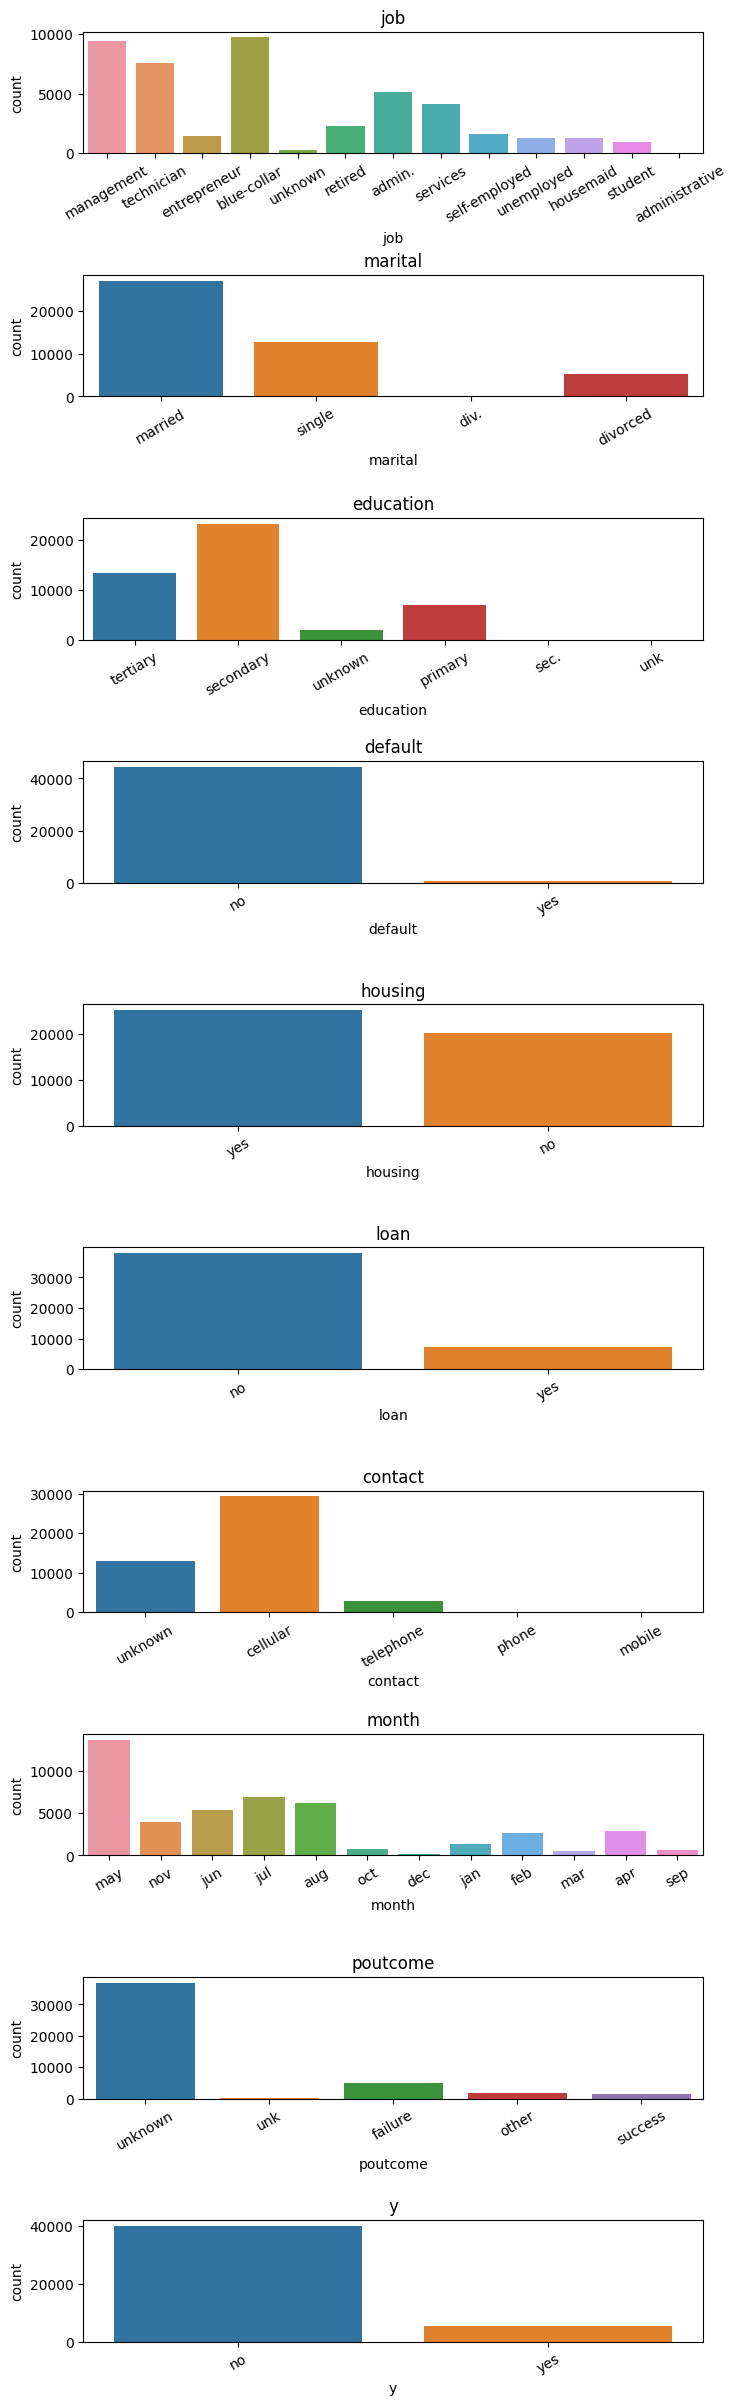

In [102]:
for column in data.columns:
  if column in cols_cat:
    data[column] = data[column].str.lower()

  #Lets see what we have now
  #Generate the plots again

fig, ax = plt.subplots(nrows=10, ncols=1, figsize=(8,30))
fig.subplots_adjust(hspace=1)

for i, col in enumerate(cols_cat):
  sns.countplot(x=col, data=data, ax=ax[i])
  ax[i].set_title(col)
  ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=30)

JOB COLUMN

In [103]:
#unifying admin. and administrative
print(data['job'].unique())
data['job'] = data['job'].str.replace('admin.','administrative', regex=False)
print(data['job'].unique())

['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student' 'administrative']
['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'administrative' 'services' 'self-employed' 'unemployed'
 'housemaid' 'student']


MARITAL COLUMN

In [104]:
#unifying div. y divorced
print(data['marital'].unique())
data['marital'] = data['marital'].str.replace('div.','divorced', regex=False)
print(data['marital'].unique())

['married' 'single' 'div.' 'divorced']
['married' 'single' 'divorced']


EDUCATION COLUMN

In [105]:
# unifying sec. y secondary, unk y unknown
print(data['education'].unique())
data['education'] = data['education'].str.replace('sec.','secondary', regex=False)
data.loc[data['education']=='unk','education'] = 'unknown'
print(data['education'].unique())

['tertiary' 'secondary' 'unknown' 'primary' 'sec.' 'unk']
['tertiary' 'secondary' 'unknown' 'primary']


CONTACT COLUMN

In [106]:
# unifying telephone y phone
print(data['contact'].unique())
data.loc[data['contact']=='phone','contact'] = 'telephone'
data.loc[data['contact']=='mobile','contact'] = 'cellular'
print(data['contact'].unique())

['unknown' 'cellular' 'telephone' 'phone' 'mobile']
['unknown' 'cellular' 'telephone']


POUTCOME COLUMN

In [107]:
# unifying unk y unknown
print(data['poutcome'].unique())
data.loc[data['poutcome']=='unk','poutcome']='unknown'
print(data['poutcome'].unique())

['unknown' 'unk' 'failure' 'other' 'success']
['unknown' 'failure' 'other' 'success']


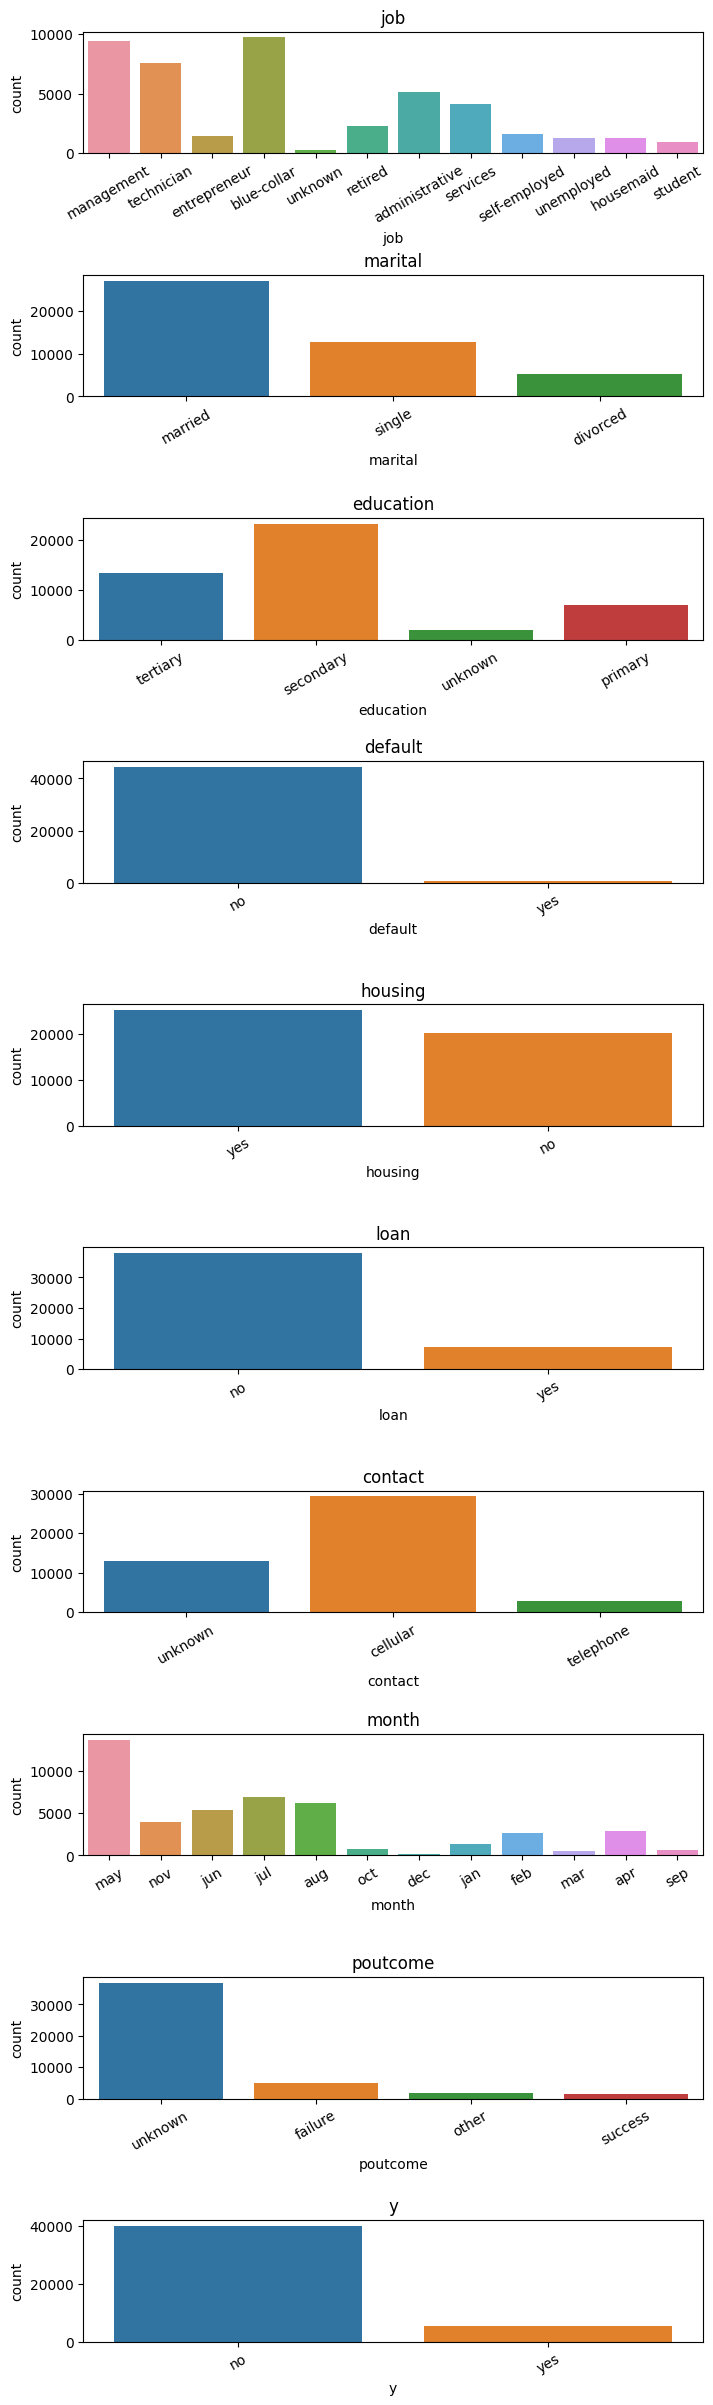

In [108]:
fig, ax = plt.subplots(nrows=10, ncols=1, figsize=(8,30))
fig.subplots_adjust(hspace=1)

for i, col in enumerate(cols_cat):
  sns.countplot(x=col, data=data, ax=ax[i])
  ax[i].set_title(col)
  ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=30)

With the previous steps applied, we can move on to the EDA stage